# Plotagem e formatação de gráficos

## Objetivos

- Realizar plotagem de gráficos de funções de uma variável;
- Compreender o funcionamento básico da classe _artist_ (_axes_, _figures_, _subplots_);
- Alterar propriedades de linhas, marcadores e legendas;
- Inserir _labels_, títulos e anotações simples; 

## Introdução à visualização de dados 

- Representar dados e informações graficamente por meio de elementos visuais
- Tabelas, gráficos, mapas e infográficos
- Diversas ferramentas disponíveis

- No contexto da análise de dados: 
    - relatórios de negócios
    - painéis de instrumentos (_dashboards_)
    - gráficos multidimensionais

## _Data storytelling_ 

- Processo de "contar histórias através dos dados". 
> Não somos inerentemente bons para "contar uma história" através dos dados. (Cole Knaflic)

## Plotagem matemática

- _Plotagem_: termo comumente empregado para o esboço de gráficos de funções matemáticas via computador.
- Nesta aual: visão geral sobre a plotagem de funções matemáticas utilizando *numpy*

## A biblioteca *matplotlib*

- Biblioteca Python mais conhecida para plotagem 2D 
- Filosofia: criar plotagens com apenas alguns comandos, ou apenas um. 
- Criado por John Hunter (_in memoriam_)
- Ele queria:
    - gráficos bonitos com pronta qualidade para publicação
    - capacidade de incorporação em interfaces gráficas para desenvolvimento de aplicações
    - um código fácil de entender e de manusear

O *matplotlib* é um código dividido em três partes: 

1. A interface *pylab*: um conjunto de funções predefinidas no submódulo `matplotlib.pyplot`.
2. O *frontend*: um conjunto de classes responsáveis pela criação de figuras, textos, linhas, gráficos etc.
3. O *backend*: um conjunto de renderizadores responsáveis por converter os gráficos para dispositivos onde eles podem ser, de fato, visualizados.

Exemplo: 

- *Backend* PS renderiza PostScript
- *Backend* SVG constroi gráficos vetoriais escaláveis

### Sessões interativas do *matplotlib*

- Em consoles, use `%matplotlib`;
- No Jupyter notebook, use `%matplotlib inline`.

In [1]:
# chamada padrão
%matplotlib inline
import matplotlib.pyplot as plt

## Criação de plots simples

Vamos importar o *numpy* para usarmos os benefícios da computação vetorizada e plotar nossos primeiros exemplos.

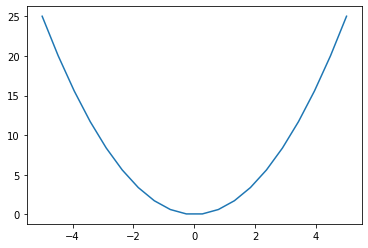

In [2]:
import numpy as np

x = np.linspace(-5,5,20) # domínio
y = x**2 # imagem 
plt.plot(x,y); # reta y = x 

**Exemplo:** plote o gráfico da parábola $f(x) = ax^2 + bx + c$ para valores quaisquer de $a,b,c$ no intervalo $-20 \leq x \leq 20$.

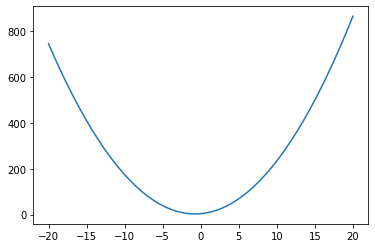

In [3]:
x = np.linspace(-20,20,50)

a,b,c = 2,3,4
y = a*x**2 + b*x + c # f(x)
plt.plot(x,y);

Podemos definir uma função para plotar a parábola:

In [4]:
def plota_parabola(a,b,c):
    x = np.linspace(-20,21,50)
    y = a*x**2 + b*x + c  
    plt.plot(x,y)

Agora podemos estudar o que cada coeficiente faz:

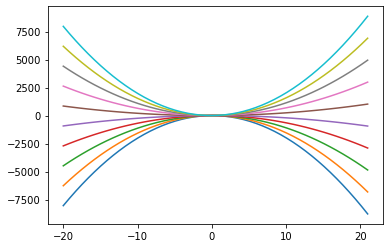

In [5]:
# mude o valor de a e considere b = 2, c = 1

for a in np.linspace(-20,20,10):
    plota_parabola(a,2,1)

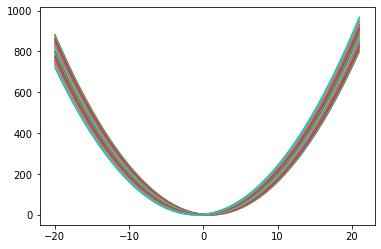

In [6]:
# mude o valor de b e considere a = 2, c = 1

for b in np.linspace(-4,4,20):
    plota_parabola(2,b,1)

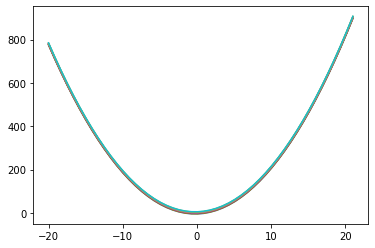

In [7]:
# mude o valor de c e considere a = 2, b = 1

for c in np.linspace(-5,5,10):
    plota_parabola(2,1,c) # por que você não vê muitas mudanças?

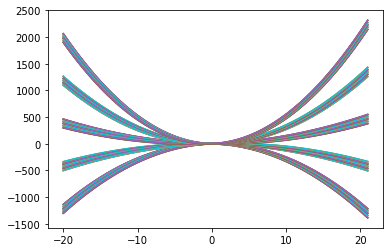

In [8]:
# mude o valor de a, b e c 

valores = np.linspace(-3,5,5)
for a in valores:
    for b in valores:
        for c in valores:
            plota_parabola(a,b,c)

**Exemplo:** plote o gráfico da função $g(t) = a\cos(bt + \pi)$ para valores quaisquer de $a$ e $b$ no intervalo $0 \leq t \leq 2\pi$.

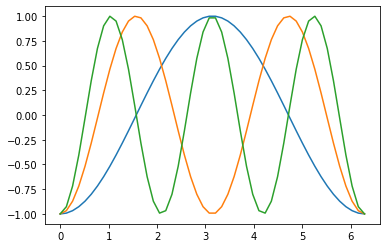

In [9]:
t = np.linspace(0,2*np.pi,50,endpoint=True) # t: ângulo

a, b = 1, 1
plt.plot(t,a*np.cos(b*t + np.pi));

b = 2
plt.plot(t,a*np.cos(b*t + np.pi));

b = 3
plt.plot(t,a*np.cos(b*t + np.pi));

## Alteração de propriedades e estilos de linhas

Altere: 

- cores com `color` ou `c`, 
- espessura de linha com `linewidth` ou `lw`
- estilo de linha com `linestyle` ou `ls`
- tipo de símbolo marcador com `marker`
- largura de borda do símbolo marcardor com `markeredgewidth` ou `mew`
- cor de borda do símbolo marcardor com `markeredgecolor` ou `mec`
- cor de face do símbolo marcardor com `markerfacecolor` ou `mfc`
- transparência com `alpha` no intervalo [0,1]

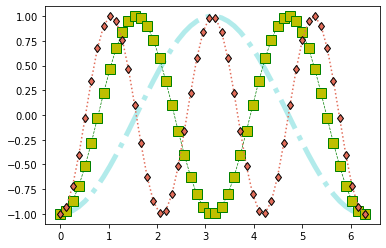

In [10]:
g = lambda a,b: a*np.cos(b*t + np.pi) # assume t anterior

# estude cada exemplo
# a ordem do 3o. argumento em diante pode mudar
plt.plot(t,g(1,1),color='c',linewidth=5,linestyle='-.',alpha=.3)
plt.plot(t,g(1,2),c='g',ls='--',lw='.7',marker='s',mfc='y',ms=10)
plt.plot(t,g(1,3),c='#e26d5a',ls=':', marker='d',mec='k',mew=1.0);

Cores e estilo de linha podem ser especificados de modo reduzido e em ordens distintas usando um especificador de formato.

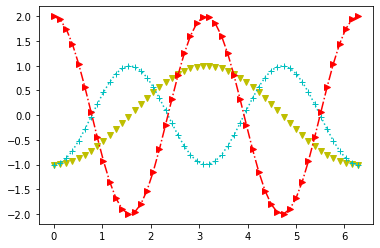

In [11]:
plt.plot(t,g(1,1),'yv') # amarelo; triângulo para baixo;
plt.plot(t,g(1,2),':c+') # pontilhado; ciano; cruz;
plt.plot(t,-g(2,2),'>-.r'); # triangulo direita; traço-ponto; vermelho;

### Plotagem múltipla

O exemplo acima poderia ser feito como plotagem múltipla em 3 blocos do tipo (`x,y,'fmt')`, onde `x` e `y` são as informações dos eixos coordenados e `fmt` é uma string de formatação.

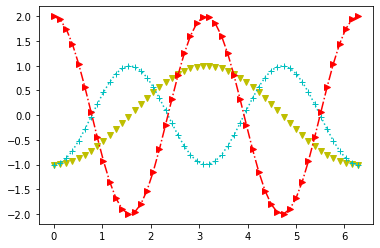

In [12]:
plt.plot(t,g(1,1),'yv', t,g(1,2),':c+', t,-g(2,2),'>-.r'); # 3 blocos sequenciados

Para verificar todas as opções de propriedades e estilos de linhas, veja `plt.plot?`.

In [13]:
#plt.plot?

### Especificação de figuras

Use `plt.figure` para criar um ambiente de figura e altere:

- a largura e altura (em polegadas) com `figsize = (largura,altura)`. O padrão é (6.4,4.8).
- a resolução (em pontos por polegadas) com `dpi`. O padrão é 100.
- a cor de fundo (*background*) com `facecolor`. O padrão é `w` (branco).

**Exemplo:** Plote os gráficos de $h_1(x) = a\sqrt{x}$ e $h_2(x) = be^{\frac{x}{c}}$ para valores de a,b,c e propriedades acima livres.

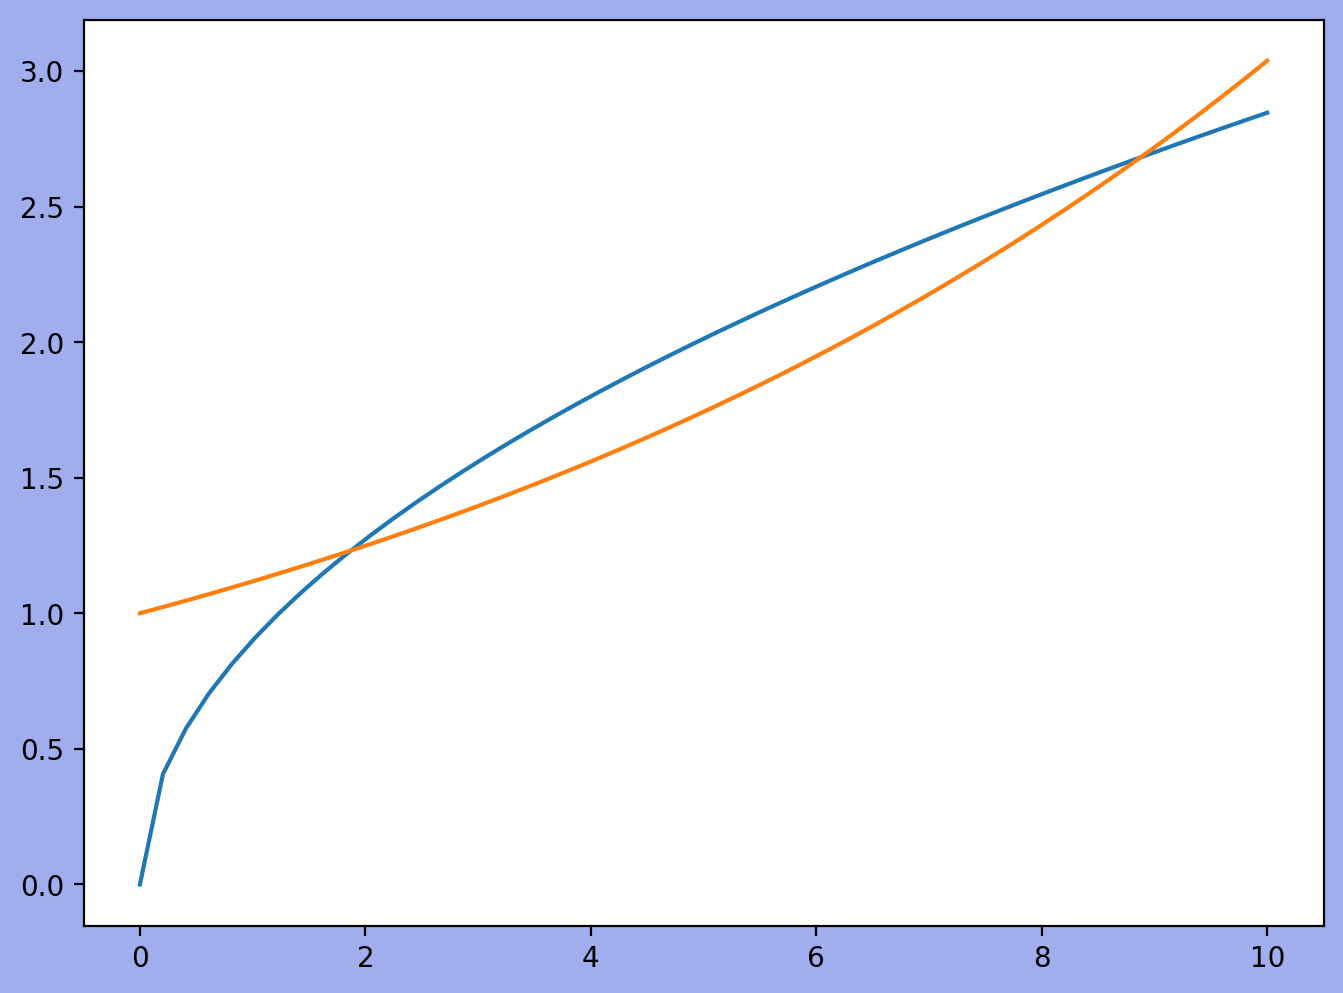

In [14]:
x = np.linspace(0,10,50,endpoint=True)

h1, h2 = lambda a: a*np.sqrt(x), lambda b,c: b*np.exp(x/c) 

plt.figure(figsize=(8,6), dpi=200, facecolor='#a0aeee')
plt.plot(x,h1(.9),x,h2(1,9));  

### Alterando limites e marcações de eixos

Altere: 

- o intervalo do eixo `x` com `xlim` 
- o intervalo do eixo `y` com `ylim`
- as marcações do eixo `x` com `xticks` 
- as marcações do eixo `y` com `yticks`

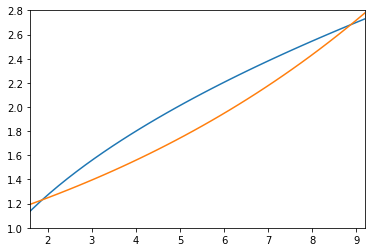

In [15]:
plt.plot(x,h1(.9),x,h2(1,9)); plt.xlim(1.6,9.2); plt.ylim(1.0,2.8);

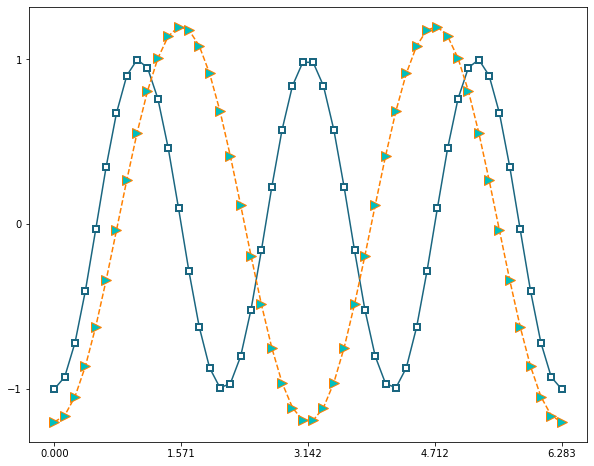

In [16]:
plt.figure(figsize=(10,8))

plt.plot(t,g(1,3),c=[0.1,0.4,0.5],marker='s',mfc='w',mew=2.0);
plt.plot(t,g(1.2,2),c=[1.0,0.5,0.0],ls='--',marker='>',mfc='c',mew=1.0,ms=10);

plt.xticks([0, np.pi/2,np.pi,3*np.pi/2,2*np.pi]); # lista de múltiplos de pi
plt.yticks([-1, 0, 1]); # 3 valores em y

### Especificando texto de marcações em eixos

Podemos alterar as marcações das `ticks` passando um texto indicativo. No caso anterior, seria melhor algo como:

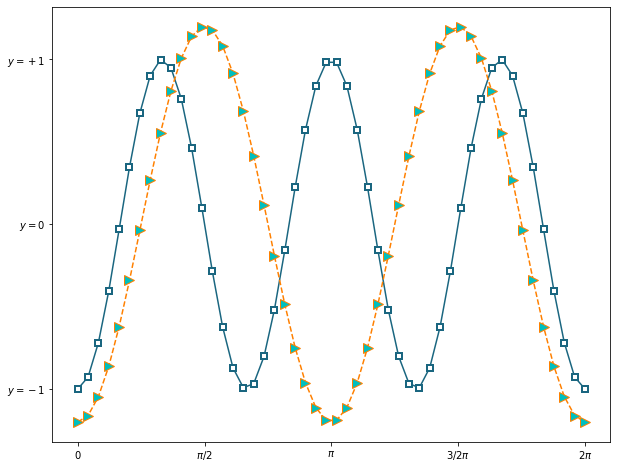

In [17]:
plt.figure(figsize=(10,8))

plt.plot(t,g(1,3),c=[0.1,0.4,0.5],marker='s',mfc='w',mew=2.0);
plt.plot(t,g(1.2,2),c=[1.0,0.5,0.0],ls='--',marker='>',mfc='c',mew=1.0,ms=10);

# o par de $...$ formata os números na linguagem TeX
plt.xticks([0, np.pi/2,np.pi,3*np.pi/2,2*np.pi], ['$0$','$\pi/2$','$\pi$','$3/2\pi$','$2\pi$']); 
plt.yticks([-1, 0, 1], ['$y = -1$', '$y = 0$', '$y = +1$']); 

### Deslocamento de eixos principais

Os eixos principais podem ser movidos para outras posições arbitrárias e as bordas da área de plotagem desligadas usando `spine`.

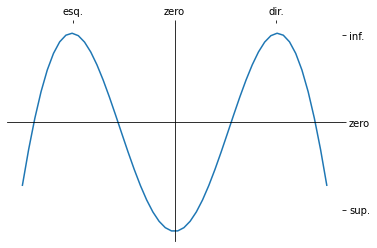

In [18]:
# plotagem da função
x = np.linspace(-3,3)
plt.plot(x,x**1/2*np.sin(x)-0.5); # f(x) = √x*sen(x) - 1/2
ax = plt.gca()  # get current axis

ax.spines['right'].set_color('none') # remove borda direita
ax.spines['top'].set_color('none') # remove borda superior

ax.spines['bottom'].set_position(('data',0)) # desloca eixo para x = 0
ax.spines['left'].set_position(('data',0)) # desloca eixo para y = 0

ax.xaxis.set_ticks_position('top') # desloca marcações para cima
ax.yaxis.set_ticks_position('right') # desloca marcações para a direita

plt.xticks([-2,0,2]) # altera ticks de x
ax.set_xticklabels(['esq.','zero','dir.']) # altera ticklabels de x

plt.yticks([-0.4,0,0.4]) # altera ticks de y
ax.set_yticklabels(['sup.','zero','inf.']); # altera ticklabels de y

### Inserção de legendas

Para criarmos:

- uma legenda para os gráficos, usamos `legend`.
- uma legenda para o eixo x, usamos `xlabel`
- uma legenda para o eixo y, usamos `ylabel`
- um título para o gráfico, usamos `title`

**Exemplo:** plote o gráfico da reta $f_1(x) = x + 1$ e da reta $f_2(x) = 1 - x$ e adicione uma legenda com cores azul e laranja.

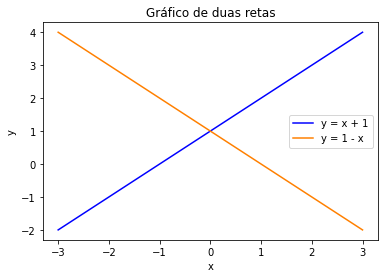

In [19]:
plt.plot(x, x + 1,'-b', label = 'y = x + 1' )
plt.plot(x, 1-x, c = [1.0,0.5,0.0], label = 'y = 1 - x'); # laranja: 100% de vermelho, 50% verde
plt.legend(loc = 'best') # 'loc=best' : melhor localização da legenda
plt.xlabel('x'); plt.ylabel('y'); plt.title('Gráfico de duas retas');

#### Localização de legendas

Use `loc=valor` para especificar onde posicionar a legenda. Use `plt.legend?` para verificar as posições disponíveis para `valor`. Vide tabela de valores `Location String` e `Location Code`.

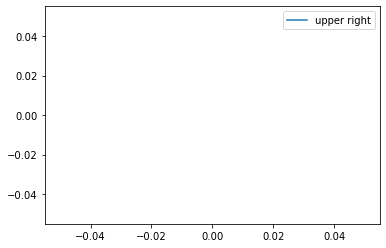

In [20]:
plt.plot(np.nan,np.nan,label='upper right'); # nan : not a number
plt.legend(loc=1); # usando número

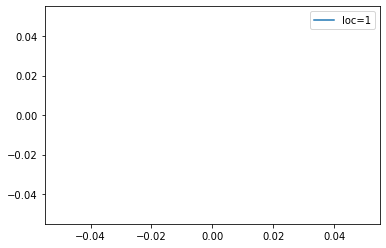

In [21]:
plt.plot(np.nan,np.nan,label='loc=1');
plt.legend(loc='upper right'); # usando a string correspondente

### Alteração de tamanho de fonte

Para alterar o tamanho da fonte de legendas, use `fontsize`.

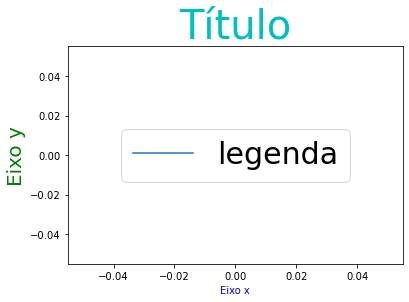

In [22]:
plt.plot(np.nan,np.nan,label='legenda');

FSx, FSy, FSleg, FStit = 10, 20, 30, 40

plt.xlabel('Eixo x',c='b', fontsize=FSx)
plt.ylabel('Eixo y',c='g', fontsize=FSy)
plt.legend(loc='center', fontsize=FSleg); 
plt.title('Título', c='c', fontsize=FStit);

### Anotações simples 

Podemos incluir anotações em gráficos com a função `annotate(texto,xref,yref)`

**Exemplo**: gere um conjunto de 10 pontos $(x,y)$ aleatórios em que $0.2 < x,y < 0.8$ e anote-os no plano.

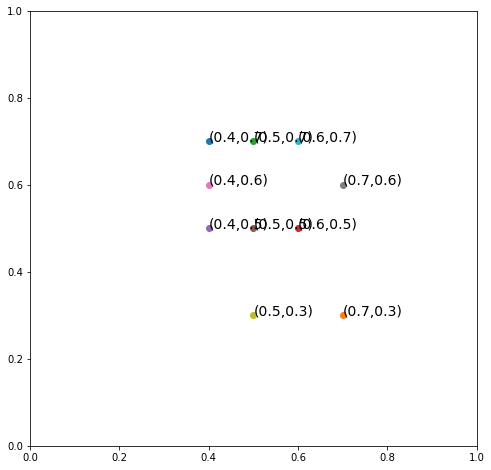

In [24]:
# gera uma lista de 10 pontos satisfazendo a condição
P = []
while len(P) != 10:
    xy = np.round(np.random.rand(2),1) 
    test = np.all( (xy > 0.2) & (xy < 0.8) )
    if test:
        P.append(tuple(xy))

# plota o plano
plt.figure(figsize=(8,8))
plt.xlim(0,1)
plt.ylim(0,1)

for ponto in P:    
    plt.plot(ponto[0],ponto[1],'o')
    plt.annotate(f'({ponto[0]},{ponto[1]})',ponto,fontsize=14)

**Problema:** o código acima tem um problema. Verifique que `len(P) = 10`, mas ele não plota os 10 pontos como gostaríamos de ver. Descubra o que está acontecendo e proponha uma solução.

## Multiplotagem e eixos

No matplotlib, podemos trabalhar com a função `subplot(m,n,p)` para criar múltiplas figuras e eixos independentes como se cada figura fosse um elemento de uma grande "matriz de figuras" de `m` linhas e `n` colunas, enquanto `p` é o índice da figura (este valor será no máximo o produto `mxn`). A função funciona da seguinte forma. 

- Exemplo 1: suponha que você queira criar 3 figuras e dispô-las em uma única linha. Neste caso, `m = 1`, `n = 3` e `p` variará de 1 a 3, visto que `mxn = 3`.

- Exemplo 2: suponha que você queira criar 6 figuras e dispô-las em 2 linhas e 3 colunas. Neste caso, `m = 2`, `n = 3` e `p` variará de 1 a 6, visto que `mxn = 6`.

- Exemplo 3: suponha que você queira criar 12 figuras e dispô-las em 4 linhas e 3 colunas. Neste caso, `m = 4`, `n = 3` e `p` variará de 1 a 12, visto que `mxn = 12`. 

Cada plotagem possui seu eixo independentemente da outra.

**Exemplo 1:** gráfico de 1 reta, 1 parábola e 1 polinômio cúbico lado a lado.

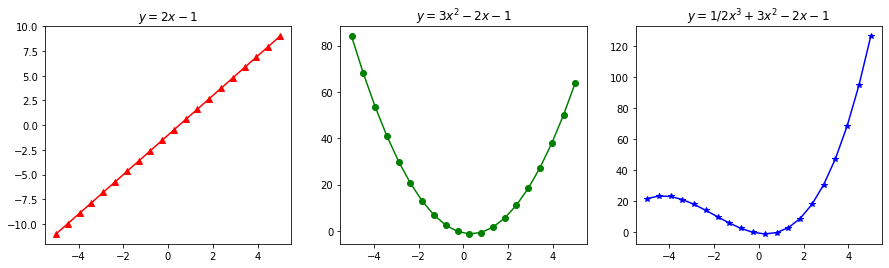

In [25]:
x = np.linspace(-5,5,20)

plt.figure(figsize=(15,4))

# aqui p = 1
plt.subplot(1,3,1) # plt.subplot(131) também é válida
plt.plot(x,2*x-1,c='r',marker='^')
plt.title('$y=2x-1$')

# aqui p = 2
plt.subplot(1,3,2) # plt.subplot(132) também é válida
plt.plot(x,3*x**2 - 2*x - 1,c='g',marker='o')
plt.title('$y=3x^2 - 2x - 1$')
 
# aqui p = 3
plt.subplot(1,3,3) # plt.subplot(133) também é válida
plt.plot(x,1/2*x**3 + 3*x**2 - 2*x - 1,c='b',marker='*')
plt.title('$y=1/2x^3 + 3x^2 - 2x - 1$');

**Exemplo 2:** gráficos de {$sen(x)$, $sen(2x)$, $sen(3x)$} e {$cos(x)$, $cos(2x)$, $cos(3x)$} dispostos em matriz 2x3.

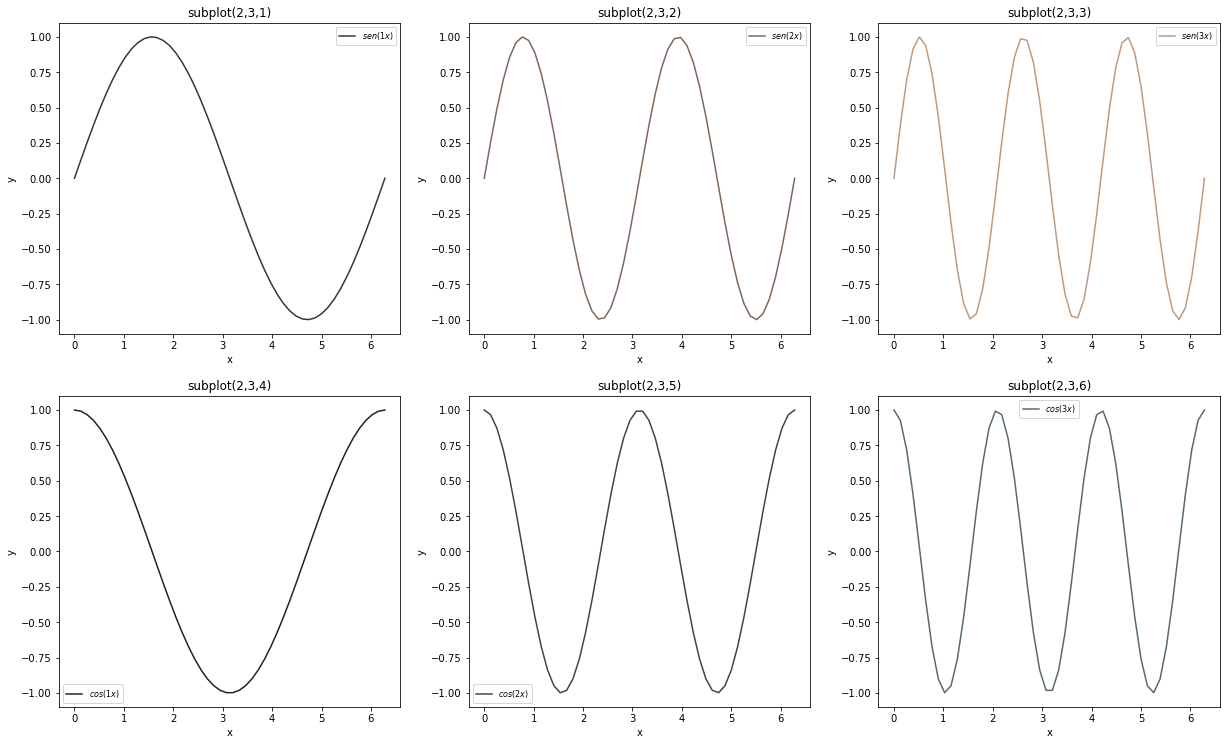

In [26]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=2.5,right=1.2) # ajusta a separação dos plots individuais

def sencosx(p):
    x = np.linspace(0,2*np.pi,50)    
    plt.subplot(2,3,p)
    if p <= 3:            
        plt.plot(x,np.sin(p*x),c=[p/4,p/5,p/6],label=f'$sen({p}x)$')
        plt.title(f'subplot(2,3,{p})');
    else:        
        plt.title(f'subplot(2,3,{p})');
        p-=3 # 
        plt.plot(x,np.cos(p*x),c=[p/9,p/7,p/8],label=f'$cos({p}x)$')
    
    plt.legend(loc=0,fontsize=8)
    plt.xlabel('x'); plt.ylabel('y'); 
        
# plotagem     
for p in range(1,7):
    sencosx(p)

**Exemplo 3:** gráficos de um ponto isolado em matriz 4 x 3.

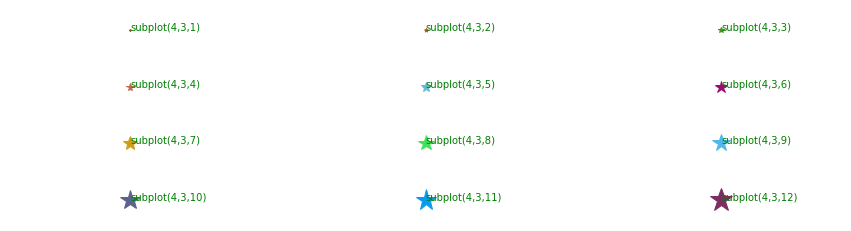

In [27]:
plt.figure(figsize=(15,4))
m,n = 4,3
def star(p):
    plt.subplot(m,n,p)
    plt.axis('off') # desliga eixos
    plt.plot(0.5,0.5,marker='*',c=list(np.random.rand(3)),ms=p*2)
    plt.annotate(f'subplot({m},{n},{p})',(0.5,0.5),c='g',fontsize=10)
     
for p in range(1,m*n+1):
    star(p);

## Plots com gradeado

Podemos habilitar o gradeado usando `grid(b,which,axis)`.

Para especificar o gradeado: 

- em ambos os eixos, use `b='True'` ou `b='False'`.
- maior, menor ou ambos, use `which='major'`, `which='minor'` ou `which='both'`.
- nos eixos x, y ou ambos, use `axis='x'`, `axis='y'` ou `axis='both'`.

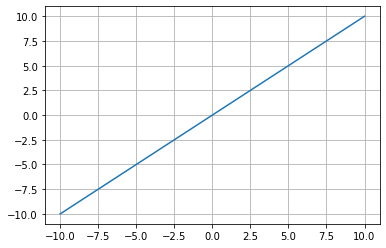

In [28]:
x = np.linspace(-10,10)
plt.plot(x,x) 
plt.grid(b='True') 

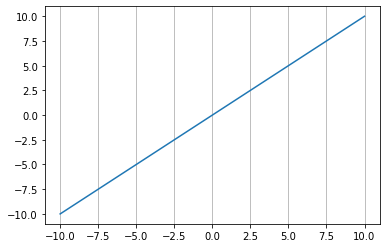

In [29]:
plt.plot(x,x)
plt.grid(True,which='major',axis='x')

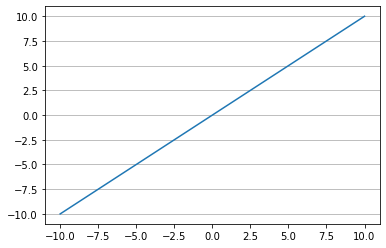

In [30]:
plt.plot(x,x)
plt.grid(True,which='major',axis='y')

**Exemplo:** plotagem de gradeado.

Neste exemplo, um eixo abstrato é adicionado sobre a figura (criada diretamente) origem no ponto (0.025,0.025), largura 0.95 e altura 0.95.

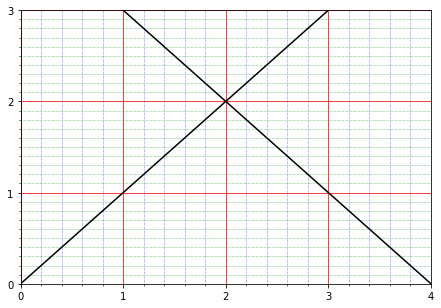

In [31]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95])
ax.set_xlim(0,4)
ax.set_ylim(0,3)

# MultipleLocator estabelece pontos de referência para divisão da grade
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0)) # divisor maior em X
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2)) # divisor maior em X
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0)) # divisor maior em Y
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1)) # divisor maior em Y

# propriedades das linhas
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='r')
ax.grid(which='minor', axis='x', linewidth=0.5, linestyle=':', color='b')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='r')
ax.grid(which='minor', axis='y', linewidth=0.5, linestyle=':', color='g')

# para remover as ticks, adicione comentários
#ax.set_xticklabels([])
#ax.set_yticklabels([]);
 
plt.plot(x,x,'k')
plt.plot(x,-x+4,'k');

## Plots com preenchimento

Podemos usar `fill_between` para criar preenchimentos de área em gráficos. 

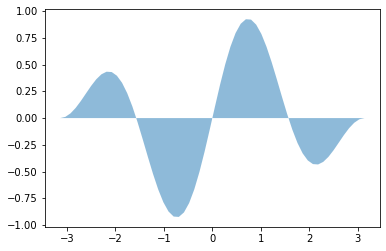

In [32]:
x = np.linspace(-np.pi, np.pi, 60)
y = np.sin(2*x)*np.cos(x/2)

plt.fill_between(x,y,alpha=0.5);

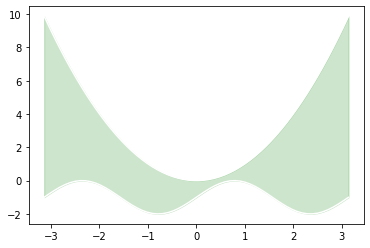

In [33]:
x = np.linspace(-np.pi, np.pi, 60)
f1 = np.sin(2*x) - 1
f2 = x**2

plt.plot(x,f1,c='w');
plt.plot(x,f2,c='w');
plt.fill_between(x,f1,f2,color='g',alpha=0.2);